## 6.5 Machine Learning Part 2 - K-means Clustering

### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering
#### 4. Standardization

### Importing libraries and data and renaming columns

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r"C:\Users\fardi\OneDrive\Desktop\CF\Data Immersion\A6.Advanced Analytics & Dashboard Design\05-12-2021 Germany Apartment Rental"

In [7]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'immo_data_clean.csv'), index_col=[0])

In [8]:
df.shape

(144591, 24)

In [9]:
df.head()

,serviceCharge,heatingType,newlyConst,balcony,totalRent,yearConstructed,hasKitchen,geo_bln,cellar,baseRent,...,petsAllowed,street,lift,typeOfFlat,noRooms,floor,numberOfFloors,garden,regio3,date
0,245.0,central_heating,False,False,840.0,1965.0,False,Nordrhein_Westfalen,True,595.0,...,no,Sch&uuml;ruferstra&szlig;e,False,ground_floor,4.0,1.0,3.000000,True,SchÃ¼ren,43586
2,255.0,floor_heating,True,True,1300.0,2019.0,False,Sachsen,True,965.0,...,no,Turnerweg,True,apartment,3.0,3.0,4.000000,False,ÃuÃere_Neustadt_Antonstadt,43739
4,138.0,self_contained_central_heating,False,True,903.0,1950.0,False,Bremen,False,765.0,...,no,Hermann-Henrich-Meier-Allee,False,apartment,3.0,1.0,3.670219,False,Neu_Schwachhausen,43862
8,110.0,oil_heating,False,False,690.0,1970.0,True,Baden_WÃ¼rttemberg,True,580.0,...,no,no_information,False,roof_storey,2.0,2.0,2.000000,False,Denzlingen,43862
10,88.0,central_heating,False,True,307.0,1930.0,False,Sachsen,True,219.0,...,no,Hofer Stra&szlig;e,False,apartment,2.0,3.0,3.670219,False,Sonnenberg,43739


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144591 entries, 0 to 268847
Data columns (total 24 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   serviceCharge    144591 non-null  float64
 1   heatingType      144591 non-null  object 
 2   newlyConst       144591 non-null  bool   
 3   balcony          144591 non-null  bool   
 4   totalRent        144591 non-null  float64
 5   yearConstructed  144591 non-null  float64
 6   hasKitchen       144591 non-null  bool   
 7   geo_bln          144591 non-null  object 
 8   cellar           144591 non-null  bool   
 9   baseRent         144591 non-null  float64
 10  livingSpace      144591 non-null  float64
 11  geo_krs          144591 non-null  object 
 12  condition        144591 non-null  object 
 13  interiorQual     144591 non-null  object 
 14  petsAllowed      144591 non-null  object 
 15  street           144591 non-null  object 
 16  lift             144591 non-null  bool

In [14]:
#### Drop column 'date'
df = df.drop(['date' ], axis=1)

In [15]:
# numerical variables
columns = []
for cols in df.columns:
    if df[cols].dtype == 'int64' or df[cols].dtype == 'float64':
        columns.append(cols)
        
columns

['serviceCharge',
 'totalRent',
 'yearConstructed',
 'baseRent',
 'livingSpace',
 'noRooms',
 'floor',
 'numberOfFloors']

In [16]:
df = df[['serviceCharge',
 'totalRent',
 'yearConstructed',
 'baseRent',
 'livingSpace',
 'noRooms',
 'floor',
 'numberOfFloors']]

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144591 entries, 0 to 268847
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   serviceCharge    144591 non-null  float64
 1   totalRent        144591 non-null  float64
 2   yearConstructed  144591 non-null  float64
 3   baseRent         144591 non-null  float64
 4   livingSpace      144591 non-null  float64
 5   noRooms          144591 non-null  float64
 6   floor            144591 non-null  float64
 7   numberOfFloors   144591 non-null  float64
dtypes: float64(8)
memory usage: 9.9 MB


### 2. The elbow technique

In [20]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [21]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-101426530903.51624,
 -55079781480.27917,
 -33801526354.727303,
 -19783811994.570473,
 -13147599462.2527,
 -9789093377.41075,
 -7782943374.091781,
 -6527907547.907618,
 -5669067741.371605]

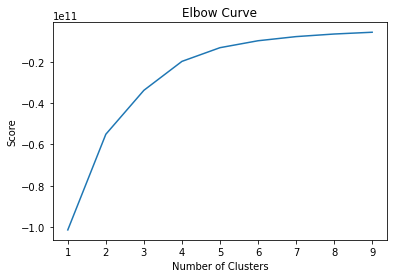

In [22]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#####  In this example, there's a large jump from two to three  and 4 on the x-axis, I have tried to use 2,3 and 4 clusters, the 2 clusters works better


### 3. k-means clustering

In [42]:
# Create the k-means object.

# kmeans = KMeans(n_clusters = 3, n_jobs = -1)  
# n_jobs does not work
kmeans = KMeans(n_clusters = 2, n_init=10) 


In [43]:
# Fit the k-means object to the data.

kmeans.fit(df)

KMeans(n_clusters=2)

In [44]:
df['clusters'] = kmeans.fit_predict(df)

In [45]:
df.head()

,serviceCharge,totalRent,yearConstructed,baseRent,livingSpace,noRooms,floor,numberOfFloors,clusters
0,245.0,840.0,1965.0,595.0,86.00,4.0,1.0,3.000000,0
2,255.0,1300.0,2019.0,965.0,83.80,3.0,3.0,4.000000,1
4,138.0,903.0,1950.0,765.0,84.97,3.0,1.0,3.670219,0
8,110.0,690.0,1970.0,580.0,53.00,2.0,2.0,2.000000,0
10,88.0,307.0,1930.0,219.0,40.20,2.0,3.0,3.670219,0


In [46]:
df['clusters'].value_counts()

0    119265
1     25326
Name: clusters, dtype: int64

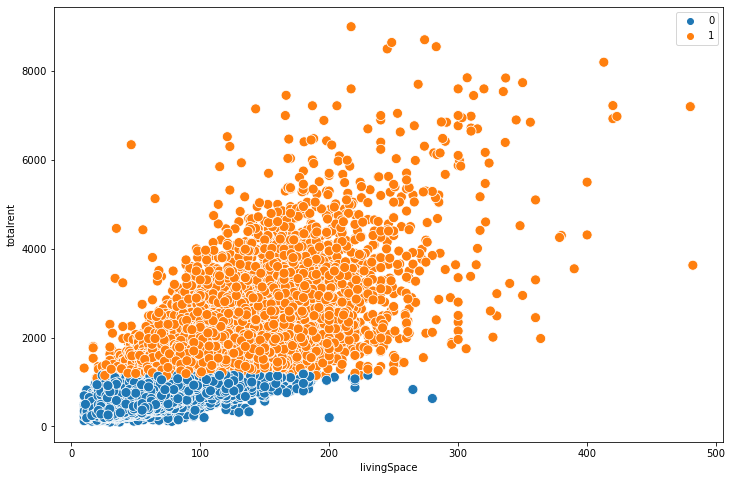

In [47]:
# Plot the clusters for the "livingSpace" and "totalRent" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['livingSpace'], y=df['totalRent'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('livingSpace') # Label x-axis.
plt.ylabel('totalrent') # Label y-axis.
plt.show()

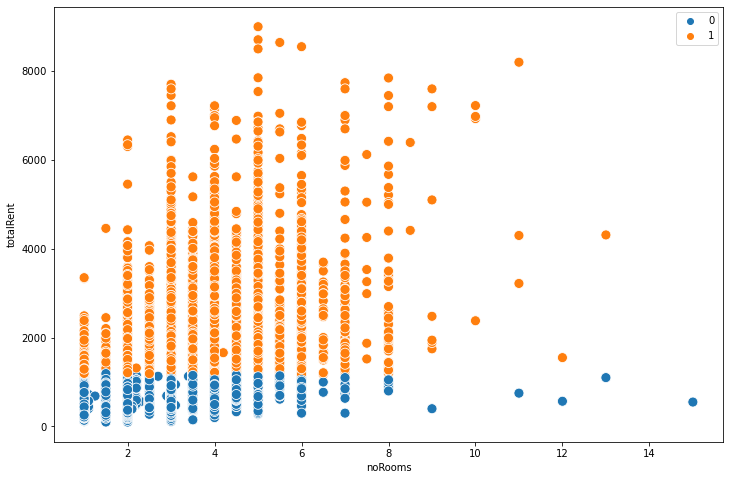

In [48]:
# Plot the clusters for the "noRoomse" and "totalRent" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['noRooms'], y=df['totalRent'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('noRooms') 
plt.ylabel('totalRent') 
plt.show()

In [49]:
# df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'orange'
df.loc[df['clusters'] == 0, 'cluster'] = 'blue'

In [54]:
df.groupby('cluster').agg({'livingSpace':['mean', 'median'], 
                         'noRooms':['mean', 'median'], 
                         'numberOfFloors':['mean', 'median'],
                          'totalRent':['mean', 'median']})

livingSpace          noRooms        numberOfFloors            \
               mean  median     mean median           mean    median   
cluster                                                                
blue      64.306117   62.38  2.46982    2.1       3.646744  3.670219   
orange   109.851839  105.00  3.36162    3.0       3.780768  3.670219   

           totalRent          
                mean  median  
cluster                       
blue      619.055737   570.0  
orange   1726.425179  1525.0

- Cluster orange has higher mean totalRent, higher mean livingSpace and higher noRooms
- numberOfFloor seems to be almost similar

## 4. Standardization

In [55]:
# load data
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'immo_data_clean.csv'), index_col=[0])

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144591 entries, 0 to 268847
Data columns (total 24 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   serviceCharge    144591 non-null  float64
 1   heatingType      144591 non-null  object 
 2   newlyConst       144591 non-null  bool   
 3   balcony          144591 non-null  bool   
 4   totalRent        144591 non-null  float64
 5   yearConstructed  144591 non-null  float64
 6   hasKitchen       144591 non-null  bool   
 7   geo_bln          144591 non-null  object 
 8   cellar           144591 non-null  bool   
 9   baseRent         144591 non-null  float64
 10  livingSpace      144591 non-null  float64
 11  geo_krs          144591 non-null  object 
 12  condition        144591 non-null  object 
 13  interiorQual     144591 non-null  object 
 14  petsAllowed      144591 non-null  object 
 15  street           144591 non-null  object 
 16  lift             144591 non-null  bool

In [58]:
df = df[['serviceCharge',
 'totalRent',
 'yearConstructed',
 'baseRent',
 'livingSpace',
 'noRooms',
 'floor',
 'numberOfFloors']]

#### Nornmalize the data

In [59]:
# normalise data (found this code online )
for cols in df.columns:
    if df[cols].dtype == 'int64' or df[cols].dtype == 'float64':
        if cols != 'livingSpace':
            df[cols] = ((df[cols] - df[cols].mean())/(df[cols].std()))

In [60]:
df.head()

,serviceCharge,totalRent,yearConstructed,baseRent,livingSpace,noRooms,floor,numberOfFloors
0,0.233809,0.049494,-0.131913,-0.091034,86.00,1.454690,-0.661930,-1.284835e-01
2,0.258809,0.893305,1.383901,0.660926,83.80,0.395945,0.490852,6.322030e-02
4,-0.033693,0.165060,-0.552972,0.254461,84.97,0.395945,-0.661930,4.098331e-13
8,-0.103693,-0.225661,0.008441,-0.121519,53.00,-0.662800,-0.085539,-3.201873e-01
10,-0.158694,-0.928225,-1.114385,-0.855188,40.20,-0.662800,0.490852,4.098331e-13


#### The elbow technique

In [61]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [62]:
# Creates a score that represents 
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] 

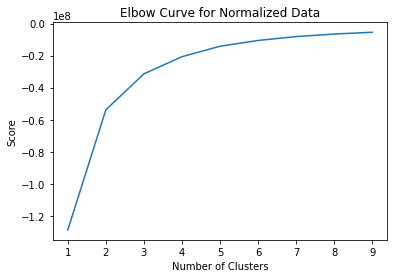

In [63]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve for Normalized Data')
pl.show()

Here also we see that the optimal number of cluster is 2

In [67]:
# Create the k-means object.
kmeans = KMeans(n_clusters = 2, n_init=10) 


In [68]:
# Fit the k-means object to the data.

kmeans.fit(df)

KMeans(n_clusters=2)

In [69]:
df['clusters'] = kmeans.fit_predict(df)

In [70]:
df.head()

,serviceCharge,totalRent,yearConstructed,baseRent,livingSpace,noRooms,floor,numberOfFloors,clusters
0,0.233809,0.049494,-0.131913,-0.091034,86.00,1.454690,-0.661930,-1.284835e-01,1
2,0.258809,0.893305,1.383901,0.660926,83.80,0.395945,0.490852,6.322030e-02,1
4,-0.033693,0.165060,-0.552972,0.254461,84.97,0.395945,-0.661930,4.098331e-13,1
8,-0.103693,-0.225661,0.008441,-0.121519,53.00,-0.662800,-0.085539,-3.201873e-01,1
10,-0.158694,-0.928225,-1.114385,-0.855188,40.20,-0.662800,0.490852,4.098331e-13,1


In [71]:
df['clusters'].value_counts()

1    111993
0     32598
Name: clusters, dtype: int64

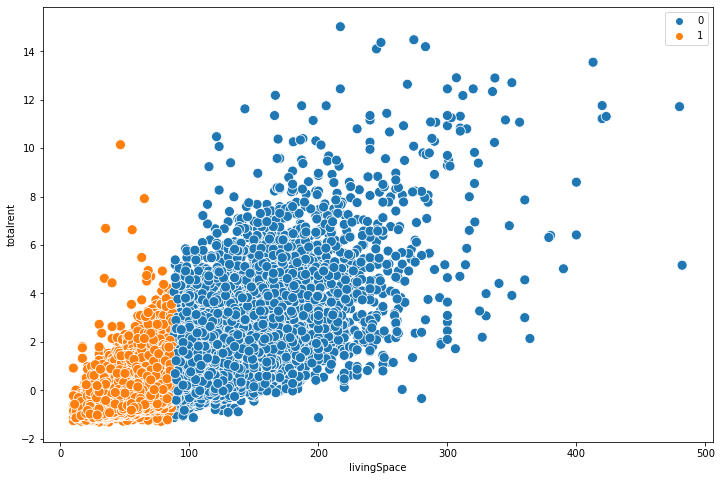

In [72]:
# Plot the clusters for the "livingSpace" and "totalRent" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['livingSpace'], y=df['totalRent'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('livingSpace') # Label x-axis.
plt.ylabel('totalrent') # Label y-axis.
plt.show()

In [73]:
# df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'orange'
df.loc[df['clusters'] == 0, 'cluster'] = 'blue'

In [74]:
df.groupby('cluster').agg({'livingSpace':['mean', 'median'], 
                         'noRooms':['mean', 'median'], 
                         'numberOfFloors':['mean', 'median'],
                          'totalRent':['mean', 'median']})

livingSpace           noRooms           numberOfFloors                \
               mean  median      mean    median           mean        median   
cluster                                                                        
blue     114.428784  105.84  1.039156  0.925318      -0.049161 -1.284835e-01   
orange    60.016494   60.73 -0.302469 -0.662800       0.014309  4.098331e-13   

        totalRent            
             mean    median  
cluster                      
blue     1.138119  0.847445  
orange  -0.331274 -0.482473

##### Standardizing the data still got the same outcome as before just the color has changed. Blue cluster has higher totalRent, higher livingSpace and noRooms but lower numberOfFloors